Unsupervised learning subsumes all kinds of machine
learning where there is **no known output**, no teacher to instruct the learning algorithm.
In unsupervised learning, the learning algorithm is just shown the input data
and asked to extract knowledge from this data.

We will look into two kinds of unsupervised learning in this chapter: **transformations of the dataset and clustering.**

Unsupervised transformations of a dataset are algorithms that **create a new representation of the data** which might be easier for humans or other machine learning algorithms to understand compared to the original representation of the data.

A common application of unsupervised transformations is dimensionality reduction, which takes a high-dimensional representation of the data, consisting of many features, and finds a new way to represent this data that summarizes the essential characteristics with
fewer features.

**Clustering algorithms**, on the other hand, partition data into distinct groups of similar
items

A major challenge in unsupervised learning is **evaluating whether the algorithm learned something useful**. Unsupervised learning algorithms are usually applied to
data that does not contain any label information, so we don’t know what the right
output should be. Therefore, it is very hard to say whether a model “did well.”

**clustering** is the task of partitioning the dataset into groups,
called **clusters**. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. 

Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each daata point, indicating which cluster a particular point belongs to.

## Summary

This section has shown that applying and evaluating clustering is a highly qualitative procedure, and often most helpful in the exploratory phase of data analysis. We looked at three clustering algorithms: **k-means, DBSCAN, and agglomerative clustering.** 

All three have a way of controlling the granularity of clustering. **k-means and agglomerative clustering allow you to specify the number of desired clusters**, while **DBSCAN lets you define proximity using the eps parameter**, which indirectly influences cluster size. 

All three methods can be used on large, real-world datasets, are relatively easy to understand, and allow for clustering into many clusters

**k-means** allows for a characterization of the clusters using the **cluster means.** It can also be viewed as a decomposition method, where each data point is represented by its cluster center. 

**DBSCAN** allows for the detection of **“noise points”** that are not assigned any cluster, and it can help **automatically determine the number of clusters.** In contrast to the other two methods, it allow for complex cluster shapes.

**Agglomerative clustering** can provide a whole hierarchy of possible
partitions of the data, which can be easily inspected via **dendrograms**

**Decomposition, manifold learning, and clustering** are essential tools to further your understanding of your data, and can be the only ways to make sense of your data in the absence of supervision information. Even in a supervised setting, exploratory
tools are important for a better understanding of the properties of the data. Often it is
hard to quantify the usefulness of an unsupervised algorithm, though this shouldn’t
deter you from using them to gather insights from your data

## Comparing and Evaluation Clustering Algorithms

One of the challenges in applying clustering algorithms is that it is very hard to assess
how well an algorithm worked, and to compare outcomes between different algo‐
rithms.

There are metrics that can be used to assess the outcome of a clustering algorithm relative to a **ground truth clustering**, the most important ones being the adjusted **rand index (ARI)** and **normalized mutual information (NMI)**, which both provide a quantitative measure between 0 and 1.

In [3]:
import mglearn
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

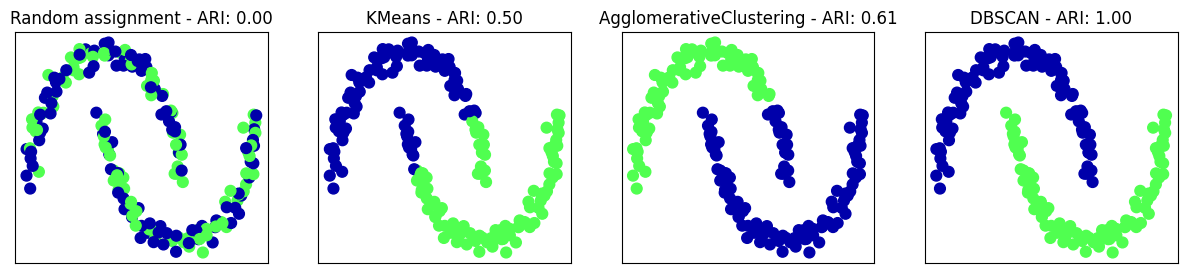

In [4]:
from sklearn.datasets import make_moons
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
 adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
 # plot the cluster assignments and cluster centers
 clusters = algorithm.fit_predict(X_scaled)
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
 cmap=mglearn.cm3, s=60)
 ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
 adjusted_rand_score(y, clusters)))


The adjusted rand index provides intuitive results, with a random cluster assignment having a score of 0 and DBSCAN (which recovers the desired clustering perfectly) having a score of 1.

A common mistake when evaluating clustering in this way is to use **accuracy_score instead of adjusted_rand_score, normalized_mutual_info_score, or some other** clustering metric. 

The problem in using accuracy is that it requires the assigned clus‐
ter labels to exactly match the ground truth. However, the cluster labels themselves are meaningless—the only thing that matters is which points are in the same cluster

In [5]:
from sklearn.metrics import accuracy_score
# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))


Accuracy: 0.00
ARI: 1.00


Although we have just shown one way to evaluate clustering algorithms, in practice,there is a big problem with using measures like ARI. When applying clustering algorithms, **there is usually no ground truth to which to compare the results.** 

If we knew the right clustering of the data, we could use this information to build a supervised model like a classifier. Therefore, using metrics like ARI and NMI usually only helps in developing algorithms, not in assessing success in an application.

There are scoring metrics for clustering that don’t require ground truth, like the **silhouette coefficient**. However, these often don’t work well in practice. The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1. While compact clusters are good, compactness doesn’t allow for complex shapes.


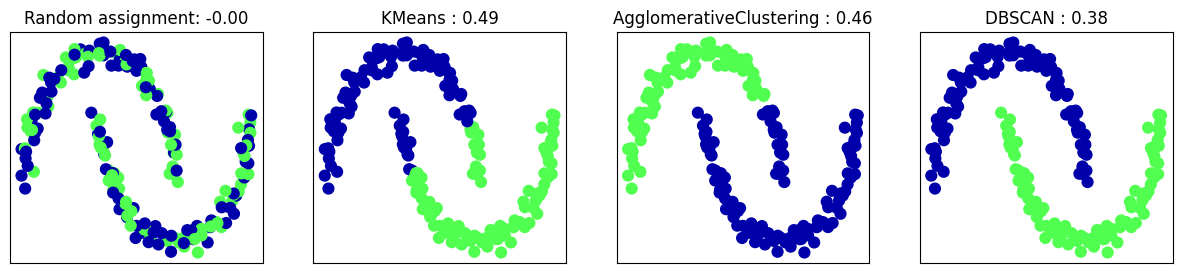

In [7]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
 silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
 clusters = algorithm.fit_predict(X_scaled)
 # plot the cluster assignments and cluster centers
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
 s=60)
 ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
 silhouette_score(X_scaled, clusters)))

A slightly better strategy for evaluating clusters
is using **robustness-based clustering metrics**. These run an algorithm after adding some noise to the data, or using different parameter settings, and compare the outcomes. 

The idea is that if many algorithm parameters and many perturbations of the
data return the same result, it is likely to be trustworthy. Unfortunately, this strategy is not implemented in scikit-learn at the time of writing.